In [55]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


Highest Cost Variation - for Inpatient...


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Variation
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,17955.63636,16878.45455,15855.18182,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,148128.43750,25519.43750,22553.56250,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,54052.21875,50882.40625,48632.28125,40323.965461
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,111618.15790,24352.05263,23402.26316,17437.811237
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,34,77093.05882,14744.05882,13710.23529,9972.780745


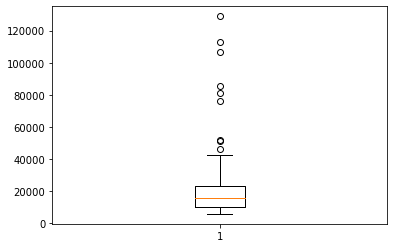

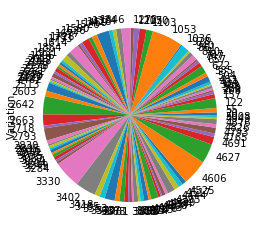

In [75]:
##Problem: Part 1:: Identify providers that overcharge for certain procedures or regions where procedures are too expensive.
#Part 1A: Highest Cost Variation
#For Inpatient::
inpatient_cost=pd.read_csv("Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
display(inpatient_cost.head())

inpatient_cost_max=inpatient_cost.loc[inpatient_cost.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
inpatient_cost_min=inpatient_cost.loc[inpatient_cost.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmin()].reset_index(drop=True)

print('Highest Cost Variation - for Inpatient...')
inpatient1 = inpatient_cost_max.copy()
inpatient1['Variation'] = inpatient_cost_max['Average Medicare Payments'] - inpatient_cost_min['Average Medicare Payments']
result = inpatient1.loc[inpatient1.groupby(['DRG Definition'])['Variation'].idxmax()]
display(result.head())

plt.boxplot(result['Variation'])
plt.show()

result['Variation'].plot(kind='pie',legend=False)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


Highest Cost Variation - for Outpatient...


,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Variation
20,0012 - Level I Debridement & Destruction,230302,HENRY FORD WEST BLOOMFIELD HOSPITAL,6777 WEST MAPLE ROAD,W BLOOMFIELD,MI,48322,MI - Royal Oak,46,107.331304,27.898261,20.593261
51,0013 - Level II Debridement & Destruction,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,20,235.417500,85.930000,47.025556
101,0015 - Level III Debridement & Destruction,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,329,685.188450,142.186505,83.536505
175,0019 - Level I Excision/ Biopsy,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,NY,10029,NY - Manhattan,12,2095.029167,416.140000,180.010667
194,0020 - Level II Excision/ Biopsy,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,96,3418.156250,808.850000,296.625625


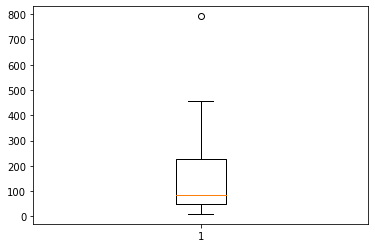

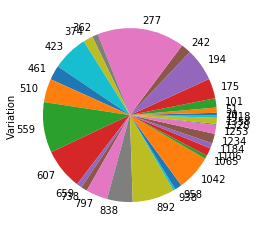

In [76]:
#For outpatient::
outpatient_cost=pd.read_csv("Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")
display(outpatient_cost.head())

outpatient_cost_max=outpatient_cost.loc[outpatient_cost.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
outpatient_cost_min=outpatient_cost.loc[outpatient_cost.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop=True)

print('Highest Cost Variation - for Outpatient...')
outpatient1=outpatient_cost_max.copy()
outpatient1['Variation']=outpatient_cost_max['Average Total Payments']-outpatient_cost_min['Average Total Payments']
result = outpatient1.loc[outpatient1.groupby(['APC'])['Variation'].idxmax()]
display(result.head())

plt.boxplot(result['Variation'])
plt.show()

result['Variation'].plot(kind='pie',legend=False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,17955.63636,16878.45455,15855.18182
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,26402.79518,24865.61446,22873.49398
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,54052.21875,50882.40625,48632.28125
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,111618.15790,24352.05263,23402.26316
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,34,77093.05882,14744.05882,13710.23529


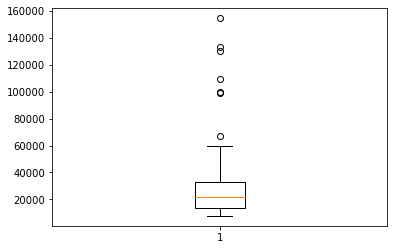

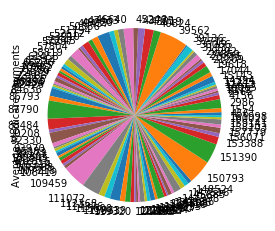

In [77]:
#Part1: B: Highest-Cost Claims by Provider

#For inpatient::
inpatient_provider_max_claim_cost=inpatient_cost.loc[inpatient_cost.groupby(['DRG Definition','Provider Id'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
result = inpatient_provider_max_claim_cost.loc[provider_max_claim_cost.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()]

display(result.head())

plt.boxplot(result['Average Medicare Payments'])
plt.show()

result['Average Medicare Payments'].plot(kind='pie',legend=False)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
424,0013 - Level II Debridement & Destruction,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,20,235.417500,85.930000
1874,0015 - Level III Debridement & Destruction,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,329,685.188450,142.186505
3322,0019 - Level I Excision/ Biopsy,50002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,CA - Alameda County,16,8766.475000,470.720000
3837,0020 - Level II Excision/ Biopsy,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,96,3418.156250,808.850000


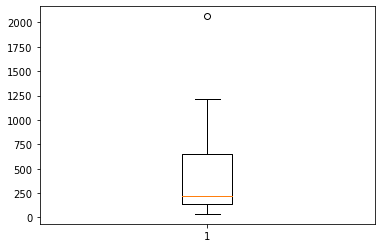

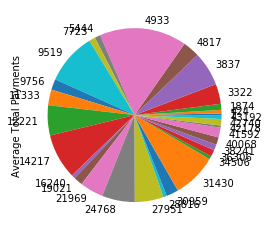

In [78]:
#For outpatient::
outpatient_provider_max_claim_cost=outpatient_cost.loc[outpatient_cost.groupby(['APC','Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)
result = outpatient_provider_max_claim_cost.loc[outpatient_provider_max_claim_cost.groupby(['APC'])['Average Total Payments'].idxmax()]
display(result.head())

plt.boxplot(result['Average Total Payments'])
plt.show()

result['Average Total Payments'].plot(kind='pie',legend=False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,17955.63636,16878.45455,15855.18182
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,26402.79518,24865.61446,22873.49398
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,64,54052.21875,50882.40625,48632.28125
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,19,111618.15790,24352.05263,23402.26316
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,SAN FRANCISCO GENERAL HOSPITAL,1001 POTRERO AVENUE,SAN FRANCISCO,CA,94110,CA - San Francisco,34,77093.05882,14744.05882,13710.23529


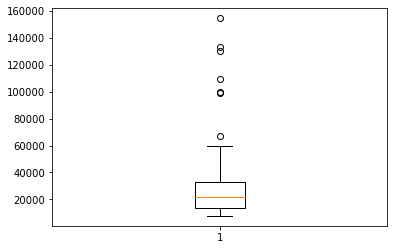

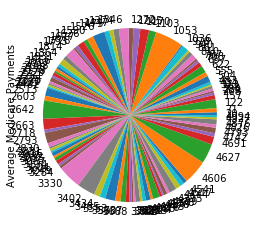

In [79]:
#Part1: C: Highest-Cost Claims by Region
#For inpatient::
inpatient_provider_max_claim_region=inpatient_cost.loc[inpatient_cost.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)
result = inpatient_provider_max_claim_region.loc[inpatient_provider_max_claim_region.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()]

display(result.head())

plt.boxplot(result['Average Medicare Payments'])
plt.show()

result['Average Medicare Payments'].plot(kind='pie',legend=False)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
51,0013 - Level II Debridement & Destruction,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,20,235.417500,85.930000
101,0015 - Level III Debridement & Destruction,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,329,685.188450,142.186505
150,0019 - Level I Excision/ Biopsy,50002,ST ROSE HOSPITAL,27200 CALAROGA AVE,HAYWARD,CA,94545,CA - Alameda County,16,8766.475000,470.720000
194,0020 - Level II Excision/ Biopsy,50153,O'CONNOR HOSPITAL,2105 FOREST AVENUE,SAN JOSE,CA,95128,CA - San Jose,96,3418.156250,808.850000


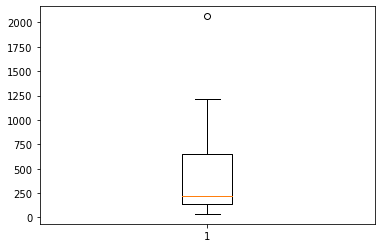

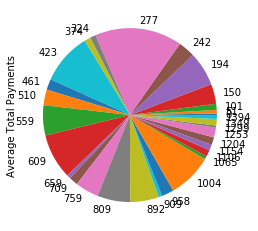

In [80]:
#For outpatient::
outpatient_provider_max_claim_region= outpatient_cost.loc[outpatient_cost.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)
result = outpatient_provider_max_claim_region.loc[outpatient_provider_max_claim_region.groupby(['APC'])['Average Total Payments'].idxmax()]
display(result.head())

plt.boxplot(result['Average Total Payments'])
plt.show()

result['Average Total Payments'].plot(kind='pie',legend=False)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,HighProcedure_LargeDiff
14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,56027.00000,18420.562500,4401.875000,876.167969
66,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,150158,IU HEALTH WEST HOSPITAL,1111 N RONALD REAGAN PKWY,AVON,IN,46123,IN - Indianapolis,13,18670.07692,7398.153846,3304.461538,314.899408
116,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,140150,UNIVERSITY OF ILLINOIS HOSPITAL,1740 WEST TAYLOR ST SUITE 1400,CHICAGO,IL,60612,IL - Chicago,16,83504.31250,38370.000000,22039.375000,1020.664062
164,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,120011,KAISER FOUNDATION HOSPITAL,3288 MOANALUA RD,HONOLULU,HI,96819,HI - Honolulu,12,25010.91667,21032.083330,4109.250000,1410.236111
235,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,310006,"ST MARY'S HOSPITAL, PASSAIC",350 BOULEVARD,PASSAIC,NJ,7055,NJ - Hackensack,11,40431.72727,9945.636364,5129.000000,437.876033


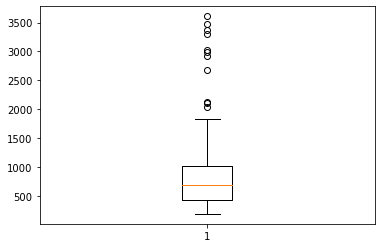

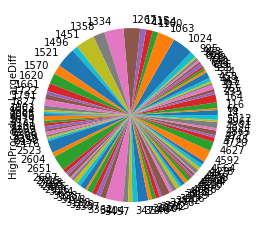

In [81]:
#Part1: D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements
#For inpatient::
high=inpatient_cost.copy()

#HighProcedure_LargeDiff
high['HighProcedure_LargeDiff']=(inpatient_cost['Average Total Payments']-inpatient_cost['Average Medicare Payments'])/inpatient_cost['Total Discharges']
high_inpatient=high.loc[high.groupby(['DRG Definition','Provider State'])['HighProcedure_LargeDiff'].idxmax()].reset_index(drop=True)
result = high_inpatient.loc[high_inpatient.groupby(['DRG Definition'])['HighProcedure_LargeDiff'].idxmax()]
display(result.head())

plt.boxplot(result['HighProcedure_LargeDiff'])
plt.show()

result['HighProcedure_LargeDiff'].plot(kind='pie',legend=False)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,HighProcedure_LargeDiff
27,0012 - Level I Debridement & Destruction,280129,NEBRASKA ORTHOPAEDIC HOSPITAL,2808 SOUTH 143RD PLZ,OMAHA,NE,68144,NE - Omaha,15,841.900000,14.460000,55.162667
48,0013 - Level II Debridement & Destruction,10158,RUSSELLVILLE HOSPITAL,15155 HIGHWAY 43,RUSSELLVILLE,AL,35653,AL - Birmingham,13,5231.000000,55.600000,398.107692
118,0015 - Level III Debridement & Destruction,230176,OAKWOOD SOUTHSHORE MEDICAL CENTER,5450 FORT STREET,TRENTON,MI,48183,MI - Dearborn,11,2661.200909,93.882727,233.392562
150,0019 - Level I Excision/ Biopsy,50739,CENTINELA HOSPITAL MEDICAL CENTER,555 EAST HARDY STREET,INGLEWOOD,CA,90301,CA - Los Angeles,12,26466.645000,392.840000,2172.817083
234,0020 - Level II Excision/ Biopsy,490112,CJW MEDICAL CENTER,1401 JOHNSTON WILLIS DRIVE,RICHMOND,VA,23235,VA - Richmond,11,15427.479090,567.060000,1350.947190


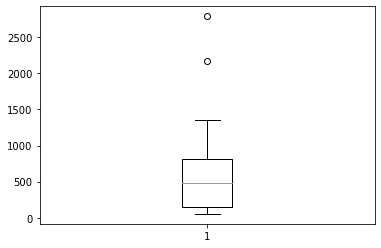

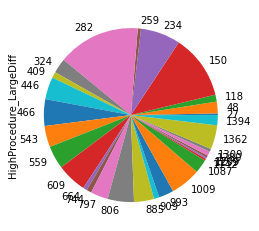

In [82]:
#For outpatient::
high =outpatient_cost.copy()

#HighProcedure_LargeDiff
high['HighProcedure_LargeDiff']=(high['Average  Estimated Submitted Charges']-high['Average Total Payments'])/high['Outpatient Services']
high_outpatient=high.loc[high.groupby(['APC','Provider State'])['HighProcedure_LargeDiff'].idxmax()].reset_index(drop=True)
result = high_outpatient.loc[high_outpatient.groupby(['APC'])['HighProcedure_LargeDiff'].idxmax()]
display(result.head())

plt.boxplot(result['HighProcedure_LargeDiff'])
plt.show()

result['HighProcedure_LargeDiff'].plot(kind='pie',legend=False)

,Provider Id,Average Medicare Payments
3143,490142,41836.888890
540,60096,39943.173080
1102,150166,25098.255195


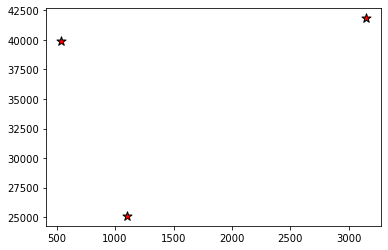

In [84]:
#Part2: Identify the three providers that are least similar to other providers and the three regions that are least similar 
#to other regions
#Part 2A: Providers Least Like Others
#For inpatient::
least_similar_inpatient_providers=inpatient_cost[['Provider Id','Average Medicare Payments']].groupby('Provider Id').mean().reset_index()
result = least_similar_inpatient_providers.sort_values('Average Medicare Payments',ascending=False).head(3)
display(result)

plt.scatter(x = result['Provider Id'].index, y = result['Average Medicare Payments'], c = 'red',
           s = 90, edgecolors = 'black',marker='*')

,Provider Id,Average Total Payments
432,50714,960.595632
3134,670061,712.396480
1474,240069,629.085289


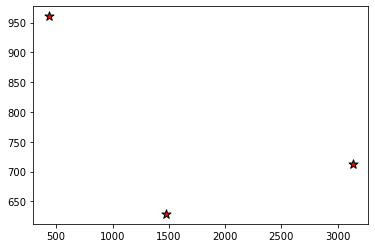

In [85]:
#For outpatient::
least_similar_outpatient_providers=outpatient_cost[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
result = least_similar_outpatient_providers.sort_values('Average Total Payments',ascending=False).head(3)
display(result)

plt.scatter(x = result['Provider Id'].index, y = result['Average Total Payments'], c = 'red',
           s = 90, edgecolors = 'black',marker='*')

,Provider State,Average Medicare Payments,State_col
0,AK,12958.973677,0
7,DC,11811.972137,7
4,CA,11494.385763,4


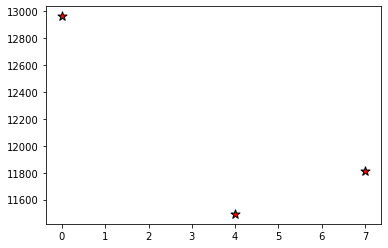

In [87]:
#Part2: B: Regions Least Like Others
#For inpatient::
least_inpatient_region_providers=inpatient_cost[['Provider State','Average Medicare Payments']].groupby('Provider State').mean().reset_index()
least_inpatient_region_providers['State_col']=least_inpatient_region_providers.index
result = least_inpatient_region_providers.sort_values('Average Medicare Payments', ascending = False).head(3)
display(result)

plt.scatter(x = result['Provider State'].index, y = result['Average Medicare Payments'], c = 'red',
           s = 90, edgecolors = 'black',marker='*')

,Provider State,Average Total Payments,State_col
6,CT,312.802783,6
30,NJ,311.496332,30
27,ND,308.585477,27


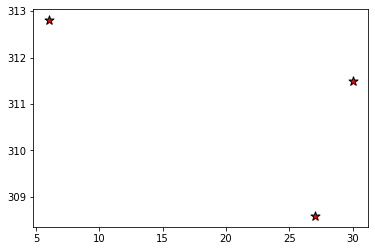

In [88]:
#For outpatients::
least_outpatient_region_providers=outpatient_cost[['Provider State','Average Total Payments']].groupby('Provider State').mean().reset_index()
least_outpatient_region_providers['State_col']=least_outpatient_region_providers.index
result = least_outpatient_region_providers.sort_values('Average Total Payments', ascending = False).head(3)
display(result)

plt.scatter(x = result['Provider State'].index, y = result['Average Total Payments'], c = 'red',
           s = 90, edgecolors = 'black',marker='*')

In [94]:
#Part3: Identify 10000 Medicare patients who are involved in anomalous activities.
patient_history=pd.read_csv("Patient_history_samp.csv")
display(patient_history.head())

transaction=pd.read_csv("Transaction_coo.csv")
display(transaction.head())

#Replacing null values with mode
patient_history.age=patient_history.age.fillna(patient_history.age.mode()[0])
patient_history.income=patient_history.income.fillna(patient_history.income.mode()[0])

transaction=transaction[['id','count']].groupby('id').sum()
patient_history.set_index('id',inplace=True)

#Combining transaction and patient_history data set, to form "x" which will form base table
result=pd.concat([transaction,patient_history],join='inner',axis=1)
display(result)

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+


,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1


,count,age,gender,income
id,,,,
7561,2,65-74,M,48000+
7619,2,<65,F,48000+
10479,4,65-74,F,<16000
13515,2,75-84,M,<16000
15213,6,85+,M,32000-47999
...,...,...,...,...
999987129,4,85+,F,<16000
999993165,4,75-84,M,<16000
999994693,4,75-84,M,<16000
